# Model creation

## Libs

In [1]:
from prepareRSSI import RssiDatas
import pandas as pd
import parameters as param
import numpy as np
import tensorflow as tf
#import intel-tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K # to set the learning rate

## Import the RSSI, mac and zones values

In [2]:
RSSI = RssiDatas()

rssi_tmp = np.genfromtxt(param.rssi_csv_output, delimiter=',')
# deleting index column and row :
rssi_tmp = np.delete(rssi_tmp, 0, 1)
RSSI.rssi = np.delete(rssi_tmp, 0, 0)

mac_tmp = np.genfromtxt(param.mac_csv_output, delimiter=',', dtype=str)
# deleting index column and row :
mac_tmp = mac_tmp[:,1] # keep only the column with the mac adresses
RSSI.mac = np.delete(mac_tmp, 0) # delete the first row because empty

zones_tmp = np.genfromtxt(param.zones_csv_output, delimiter=',')
# deleting index column and row :
zones_tmp = zones_tmp[:,1] # keep only the colomn with the zone ids
RSSI.zones = np.delete(zones_tmp, 0, 0) # delete the first row because empty

## Pre load datas into model

In [3]:
print("RSSI.rssi : ", np.shape(RSSI.rssi))
print("RSSI.zones : ", np.shape(RSSI.zones))
zonesNb = 7 # number of zones

# create the zone output array of vectors :
y_zones = np.zeros([np.size(RSSI.zones), zonesNb])
for i in range(np.size(RSSI.zones)):
    y_zones[i, int(RSSI.zones[i])] = 1

train_data, test_data, train_labels, test_labels = train_test_split(RSSI.rssi,y_zones)
print("train_data : ", np.shape(train_data))
print("train_labels : ", np.shape(train_labels))
print("test_data : ", np.shape(test_data))
print("test_labels : ", np.shape(test_labels))
# normalize the RSSI values from 0 to 1
train_data = train_data/(-95)
test_data = test_data/(-95)

RSSI.rssi :  (265, 128)
RSSI.zones :  (265,)
train_data :  (198, 128)
train_labels :  (198, 7)
test_data :  (67, 128)
test_labels :  (67, 7)


## Create the model

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(np.size(RSSI.mac), activation='relu'),
  tf.keras.layers.Dropout(param.dropout),
  tf.keras.layers.Dense(np.size(RSSI.mac), activation='relu'),
  tf.keras.layers.Dropout(param.dropout),
  tf.keras.layers.Dense(np.size(RSSI.mac), activation='relu'),
  tf.keras.layers.Dropout(param.dropout),
  tf.keras.layers.Dense(7)
])

## Compile the model

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])
K.set_value(model.optimizer.learning_rate, param.learningRate)

## Train the model

In [6]:
history = model.fit(train_data, train_labels,
                    epochs=param.epochs,
                    validation_data=(test_data, test_labels))

Epoch 1/1000
7/7 [==============================] - 0s 16ms/step - loss: 0.4814 - accuracy: 0.0859 - val_loss: 0.1790 - val_accuracy: 0.0896
Epoch 2/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.3485 - accuracy: 0.1515 - val_loss: 0.1436 - val_accuracy: 0.0597
Epoch 3/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.2975 - accuracy: 0.1465 - val_loss: 0.1349 - val_accuracy: 0.0597
Epoch 4/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.2591 - accuracy: 0.1414 - val_loss: 0.1311 - val_accuracy: 0.0597
Epoch 5/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.2408 - accuracy: 0.1263 - val_loss: 0.1263 - val_accuracy: 0.2537
Epoch 6/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.2275 - accuracy: 0.1414 - val_loss: 0.1238 - val_accuracy: 0.1791
Epoch 7/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.2087 - accuracy: 0.1768 - val_loss: 0.1226 - val_accuracy: 0.1791
Epoch 8/1000
7/7 [=

7/7 [==============================] - 0s 3ms/step - loss: 0.1202 - accuracy: 0.2929 - val_loss: 0.1149 - val_accuracy: 0.1791
Epoch 60/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1207 - accuracy: 0.2677 - val_loss: 0.1147 - val_accuracy: 0.1791
Epoch 61/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1213 - accuracy: 0.2576 - val_loss: 0.1149 - val_accuracy: 0.2090
Epoch 62/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1227 - accuracy: 0.2525 - val_loss: 0.1147 - val_accuracy: 0.2388
Epoch 63/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1216 - accuracy: 0.2020 - val_loss: 0.1142 - val_accuracy: 0.2388
Epoch 64/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1212 - accuracy: 0.2475 - val_loss: 0.1139 - val_accuracy: 0.1940
Epoch 65/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1200 - accuracy: 0.2879 - val_loss: 0.1135 - val_accuracy: 0.1940
Epoch 66/1000
7/7 [========

7/7 [==============================] - 0s 3ms/step - loss: 0.1017 - accuracy: 0.5303 - val_loss: 0.0962 - val_accuracy: 0.6716
Epoch 118/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1021 - accuracy: 0.5303 - val_loss: 0.0960 - val_accuracy: 0.6567
Epoch 119/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1000 - accuracy: 0.5101 - val_loss: 0.0944 - val_accuracy: 0.6716
Epoch 120/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1008 - accuracy: 0.5253 - val_loss: 0.0938 - val_accuracy: 0.6866
Epoch 121/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0997 - accuracy: 0.5253 - val_loss: 0.0937 - val_accuracy: 0.5970
Epoch 122/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0989 - accuracy: 0.5404 - val_loss: 0.0936 - val_accuracy: 0.5821
Epoch 123/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1002 - accuracy: 0.5354 - val_loss: 0.0929 - val_accuracy: 0.6418
Epoch 124/1000
7/7 [=

Epoch 175/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0764 - accuracy: 0.7374 - val_loss: 0.0654 - val_accuracy: 0.8955
Epoch 176/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0774 - accuracy: 0.7323 - val_loss: 0.0666 - val_accuracy: 0.8955
Epoch 177/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0783 - accuracy: 0.7374 - val_loss: 0.0647 - val_accuracy: 0.8955
Epoch 178/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0765 - accuracy: 0.7525 - val_loss: 0.0641 - val_accuracy: 0.9104
Epoch 179/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0760 - accuracy: 0.7222 - val_loss: 0.0644 - val_accuracy: 0.9104
Epoch 180/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0774 - accuracy: 0.7727 - val_loss: 0.0646 - val_accuracy: 0.8955
Epoch 181/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0744 - accuracy: 0.7576 - val_loss: 0.0643 - val_accuracy: 0.8657
Epoch 

Epoch 233/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0587 - accuracy: 0.8333 - val_loss: 0.0440 - val_accuracy: 0.8955
Epoch 234/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0591 - accuracy: 0.8838 - val_loss: 0.0421 - val_accuracy: 0.9403
Epoch 235/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0572 - accuracy: 0.8838 - val_loss: 0.0430 - val_accuracy: 0.9104
Epoch 236/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0556 - accuracy: 0.8889 - val_loss: 0.0452 - val_accuracy: 0.9104
Epoch 237/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.8687 - val_loss: 0.0420 - val_accuracy: 0.9104
Epoch 238/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0572 - accuracy: 0.8636 - val_loss: 0.0419 - val_accuracy: 0.9403
Epoch 239/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0576 - accuracy: 0.8737 - val_loss: 0.0442 - val_accuracy: 0.9254
Epoch 

Epoch 291/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0434 - accuracy: 0.9394 - val_loss: 0.0292 - val_accuracy: 0.9552
Epoch 292/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9444 - val_loss: 0.0280 - val_accuracy: 0.9403
Epoch 293/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.9444 - val_loss: 0.0293 - val_accuracy: 0.9403
Epoch 294/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0439 - accuracy: 0.9192 - val_loss: 0.0293 - val_accuracy: 0.9552
Epoch 295/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 0.9141 - val_loss: 0.0287 - val_accuracy: 0.9403
Epoch 296/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0421 - accuracy: 0.9293 - val_loss: 0.0286 - val_accuracy: 0.9552
Epoch 297/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 0.9242 - val_loss: 0.0276 - val_accuracy: 0.9552
Epoch 

Epoch 349/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9596 - val_loss: 0.0207 - val_accuracy: 0.9701
Epoch 350/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9394 - val_loss: 0.0206 - val_accuracy: 0.9552
Epoch 351/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9495 - val_loss: 0.0218 - val_accuracy: 0.9552
Epoch 352/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9444 - val_loss: 0.0205 - val_accuracy: 0.9552
Epoch 353/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.9495 - val_loss: 0.0199 - val_accuracy: 0.9552
Epoch 354/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0358 - accuracy: 0.9495 - val_loss: 0.0196 - val_accuracy: 0.9552
Epoch 355/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.9646 - val_loss: 0.0205 - val_accuracy: 0.9552
Epoch 

Epoch 407/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9596 - val_loss: 0.0155 - val_accuracy: 0.9851
Epoch 408/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9798 - val_loss: 0.0165 - val_accuracy: 0.9701
Epoch 409/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9495 - val_loss: 0.0151 - val_accuracy: 0.9701
Epoch 410/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9596 - val_loss: 0.0149 - val_accuracy: 0.9851
Epoch 411/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9697 - val_loss: 0.0150 - val_accuracy: 0.9851
Epoch 412/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9646 - val_loss: 0.0149 - val_accuracy: 0.9701
Epoch 413/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9545 - val_loss: 0.0147 - val_accuracy: 0.9851
Epoch 

Epoch 465/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9596 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 466/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.9798 - val_loss: 0.0125 - val_accuracy: 0.9851
Epoch 467/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9798 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 468/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9848 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 469/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9848 - val_loss: 0.0124 - val_accuracy: 0.9851
Epoch 470/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9848 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 471/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0238 - accuracy: 0.9899 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 

Epoch 523/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9949 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 524/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9848 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 525/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.9899 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 526/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.9848 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 527/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9848 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 528/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9949 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 529/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.9899 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 

Epoch 581/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.9848 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 582/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9949 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 583/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9949 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 584/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9949 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 585/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0193 - accuracy: 0.9798 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 586/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0168 - accuracy: 0.9899 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 587/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 

Epoch 639/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 640/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 641/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9949 - val_loss: 0.0073 - val_accuracy: 1.0000
Epoch 642/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 643/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0186 - accuracy: 0.9798 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 644/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9798 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 645/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9747 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 

Epoch 697/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 0.9949 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 698/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 699/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0146 - accuracy: 0.9949 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 700/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9949 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 701/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 702/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 703/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 

Epoch 755/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.9949 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 756/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 757/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 0.9848 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 758/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.9949 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 759/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.9949 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 760/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 761/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 

Epoch 813/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9949 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 814/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 815/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9949 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 816/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9949 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 817/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9949 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 818/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 819/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 

Epoch 871/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 0.9949 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 872/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 873/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.9949 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 874/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 875/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 876/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 877/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 

Epoch 929/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 930/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9949 - val_loss: 0.0109 - val_accuracy: 0.9701
Epoch 931/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9899 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 932/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 933/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 934/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 935/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 

Epoch 987/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 988/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 989/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 990/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 991/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 992/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.9949 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 993/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 0.9949 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 

## Ploting learning datas

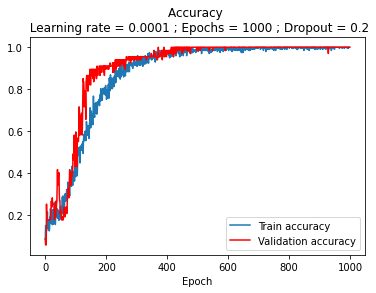

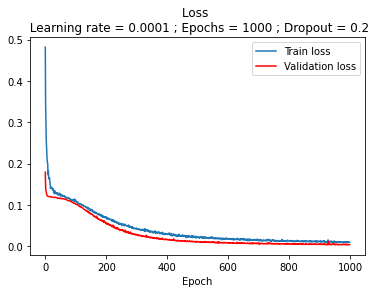

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(1)
plt.plot(acc, label="Train accuracy")
plt.plot(val_acc,color="red", label="Validation accuracy")
plt.legend(loc="lower right")
plt.title("Accuracy \n Learning rate = " + str(param.learningRate) + " ; Epochs = " + str(param.epochs) + " ; Dropout = " + str(param.dropout))
plt.xlabel("Epoch")
name = param.plot_saving_location + "plot_accuracy_lr_" + str(param.learningRate) + "_ep_" + str(param.epochs) + "_dr_" + str(param.dropout) + ".pdf"
name = name.replace(".", ",", 2) # replace the two first dots
plt.savefig(name, format="pdf")

plt.figure(2)
plt.plot(loss, label="Train loss")
plt.plot(val_loss,color="red", label="Validation loss")
plt.legend(loc="upper right")
plt.title("Loss \n Learning rate = " + str(param.learningRate) + " ; Epochs = " + str(param.epochs) + " ; Dropout = " + str(param.dropout))
plt.xlabel("Epoch")
name = param.plot_saving_location + "plot_loss_lr_" + str(param.learningRate) + "_ep_" + str(param.epochs) + "_dr_" + str(param.dropout) + ".pdf"
name = name.replace(".", ",", 2)
plt.savefig(name, format="pdf")

